# 최적의 토픽 갯수 구하기

#### review 데이터 수집 및 전처리

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

df = pd.read_csv('./data/review.csv')

df

,Unnamed: 0,review,rate
0,0,"인셉션은 대단하다 느꼈는데, 인터스텔라는 경이롭다고 느껴진다.",10
1,1,결론만 말하자면 대박이다 더이상 어떤단어로 칭찬해야하는지도모르겠다.약 3시간의 긴러...,10
2,2,전율과 환희의 169분이였다. 그 어떤 영화도 시도한 적 없는 명석함과 감동이 담겨...,10
3,3,다크나이트 라이즈에 6점을 줬던 박평식이 7점을 줬다.,10
4,4,이 영화가 명량이나 도둑들보다 관객수가 적다면 진짜 부끄러울듯,10
...,...,...,...
5435,5435,최악이다 진짜 뭘말하는거야,1
5436,5436,삥뜯기영화 딱보면 느낌아니까,1
5437,5437,영화의 본질은 재미라고 생각하는 사람에게 있어 초반전개는 너무 지루했고 한시간만에 ...,1
5438,5438,"7 주려다 영화볼 줄 모르는 10점이 너무 많아 1 준다. 1, 재미없고 지루하다....",1


In [54]:
df = df.dropna(how = 'any')
df['review'] = df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

okt = Okt()
tokenized_data = []

for sentence in df['review']:
    temp_X = okt.nouns(sentence) # 명사만 추출
    temp_X = [word for word in temp_X if len(word)>1] # 2글자 이상만 추출
    tokenized_data.append(temp_X)

pd.DataFrame(tokenized_data).to_csv('./data/review_tokenized.csv')

In [55]:
pd.DataFrame(tokenized_data)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,인셉션,인터스텔라,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,결론,대박,이상,단어,칭찬,시간,러닝,타임,시간,상황,...,None,None,None,None,None,None,None,None,None,None
2,전율,환희,영화,시도,감동,영화,놀란,야심,능력,존경,...,None,None,None,None,None,None,None,None,None,None
3,다크나이트,라이즈,박평,식이,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,영화,명량,도둑,관객수,진짜,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5415,최악,진짜,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5416,영화,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5417,영화,본질,재미,생각,사람,초반,전개,시간,다중,후반,...,None,None,None,None,None,None,None,None,None,None
5418,영화,과학,시작,하나,우연,외계인,실현,가능성,제로,공상,...,None,None,None,None,None,None,None,None,None,None


#### 시각화를 위한 pyLDAvis 설치

In [56]:
conda install -c conda-forge pyldavis

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


#### 토픽 갯수별 응집도 구하기

100%|██████████████████████████████████████████████████████████████████████████| 5421/5421 [00:00<00:00, 679435.89it/s]
2020-11-11 01:11:07,951 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-11-11 01:11:08,038 : INFO : built Dictionary(9346 unique tokens: ['', '0', '1', '10', '11']...) from 5421 documents (total 200577 corpus positions)
2020-11-11 01:11:08,051 : INFO : discarding 8944 tokens: [('', 5420), ('0', 2), ('1', 2), ('10', 2), ('11', 2), ('12', 2), ('13', 2), ('14', 2), ('15', 2), ('16', 2)]...
2020-11-11 01:11:08,052 : INFO : keeping 402 tokens which were in no less than 10 and no more than 271 (=5.0%) documents
2020-11-11 01:11:08,054 : INFO : resulting dictionary: Dictionary(402 unique tokens: ['인셉션', '인터스텔라', '결론', '단어', '대박']...)


Number of unique tokens: 402
Number of documents: 5421


2020-11-11 01:11:08,100 : INFO : using symmetric alpha at 0.5
2020-11-11 01:11:08,101 : INFO : using symmetric eta at 0.5
2020-11-11 01:11:08,101 : INFO : using serial LDA version on this node
2020-11-11 01:11:08,102 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 5421 documents, updating model once every 2000 documents, evaluating perplexity every 5421 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-11 01:11:08,103 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-11-11 01:11:08,104 : INFO : PROGRESS: pass 0, at document #2000/5421
2020-11-11 01:11:08,691 : INFO : merging changes from 2000 documents into a model of 5421 documents
2020-11-11 01:11:08,693 : INFO : topic #0 (0.500): 0.024*"사람" + 0.018*"과학" + 0.016*"인간" + 0.016*"이해" + 0.015*"경이" + 0.015*"정도" + 0.014*"그냥" + 0.014*"소름" + 0.014*"처음" + 0.013*"표현"
2020-11-11 01:11:

2020-11-11 01:11:19,724 : INFO : topic #8 (0.071): 0.041*"그냥" + 0.040*"상상력" + 0.034*"명작" + 0.030*"재미" + 0.030*"내내" + 0.022*"인류" + 0.022*"진심" + 0.022*"최고다" + 0.020*"과학" + 0.019*"미래"
2020-11-11 01:11:19,724 : INFO : topic #11 (0.071): 0.058*"그냥" + 0.045*"영화관" + 0.026*"차원" + 0.026*"정도" + 0.019*"처음" + 0.019*"인생" + 0.017*"이론" + 0.017*"사랑" + 0.017*"느낌" + 0.017*"소름"
2020-11-11 01:11:19,725 : INFO : topic #13 (0.071): 0.046*"평점" + 0.034*"이상" + 0.028*"인생" + 0.025*"장면" + 0.018*"인셉션" + 0.018*"인터스텔라" + 0.018*"집중" + 0.018*"처음" + 0.018*"대박" + 0.017*"영화관"
2020-11-11 01:11:19,726 : INFO : topic #3 (0.071): 0.055*"인생" + 0.039*"정도" + 0.028*"우리" + 0.028*"사람" + 0.028*"상상력" + 0.025*"평점" + 0.023*"인간" + 0.021*"경이" + 0.020*"과학" + 0.018*"조금"
2020-11-11 01:11:19,727 : INFO : topic #5 (0.071): 0.062*"인생" + 0.043*"한번" + 0.031*"이영화" + 0.025*"영화관" + 0.022*"사람" + 0.022*"정도" + 0.022*"추천" + 0.022*"그냥" + 0.019*"가장" + 0.018*"대박"
2020-11-11 01:11:19,728 : INFO : topic diff=8.681696, rho=1.000000
2020-11-11 01:11:19,728 :

2020-11-11 01:11:30,481 : INFO : using symmetric alpha at 0.038461538461538464
2020-11-11 01:11:30,482 : INFO : using symmetric eta at 0.038461538461538464
2020-11-11 01:11:30,483 : INFO : using serial LDA version on this node
2020-11-11 01:11:30,485 : INFO : running online (single-pass) LDA training, 26 topics, 1 passes over the supplied corpus of 5421 documents, updating model once every 2000 documents, evaluating perplexity every 5421 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-11 01:11:30,486 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-11-11 01:11:30,488 : INFO : PROGRESS: pass 0, at document #2000/5421
2020-11-11 01:11:30,753 : INFO : merging changes from 2000 documents into a model of 5421 documents
2020-11-11 01:11:30,755 : INFO : topic #11 (0.038): 0.033*"인터스텔라" + 0.029*"이건" + 0.029*"다시" + 0.028*"사람" + 0.028*"인간" + 0.024*"경이" + 0.024*"처음" + 0.024*"보고" + 0.

2020-11-11 01:11:37,049 : INFO : topic #17 (0.031): 0.132*"인터스텔라" + 0.116*"인셉션" + 0.094*"대박" + 0.056*"그냥" + 0.050*"노잼" + 0.044*"관객" + 0.038*"한마디" + 0.036*"인간" + 0.026*"과학" + 0.026*"그래비티"
2020-11-11 01:11:37,050 : INFO : topic #26 (0.031): 0.202*"과학" + 0.079*"느낌" + 0.047*"평론가" + 0.039*"마술" + 0.038*"분동" + 0.034*"글쎄" + 0.026*"표현" + 0.022*"주인공" + 0.022*"과대" + 0.021*"와우"
2020-11-11 01:11:37,051 : INFO : topic #7 (0.031): 0.191*"인생" + 0.058*"실망" + 0.049*"미래" + 0.048*"기대" + 0.047*"세계" + 0.027*"뭔가" + 0.027*"장난" + 0.026*"작품" + 0.026*"흥행" + 0.025*"공부"
2020-11-11 01:11:37,052 : INFO : topic diff=0.350368, rho=0.577350
2020-11-11 01:11:37,055 : INFO : using ParallelWordOccurrenceAccumulator(processes=5, batch_size=64) to estimate probabilities from sliding windows
2020-11-11 01:11:41,157 : INFO : 5 accumulators retrieved from output queue
2020-11-11 01:11:41,223 : INFO : accumulated word occurrence stats for 4430 virtual documents
2020-11-11 01:11:42,171 : INFO : using symmetric alpha at 0.0263157

2020-11-11 01:11:48,804 : INFO : topic #26 (0.023): 0.057*"머리" + 0.050*"이해" + 0.048*"스포" + 0.038*"세번" + 0.036*"별로" + 0.033*"부분" + 0.031*"경의" + 0.031*"순간" + 0.030*"살짝" + 0.028*"보고"
2020-11-11 01:11:48,804 : INFO : topic diff=0.347814, rho=0.707107
2020-11-11 01:11:49,034 : INFO : -7.215 per-word bound, 148.6 perplexity estimate based on a held-out corpus of 1421 documents with 4137 words
2020-11-11 01:11:49,035 : INFO : PROGRESS: pass 0, at document #5421/5421
2020-11-11 01:11:49,201 : INFO : merging changes from 1421 documents into a model of 5421 documents
2020-11-11 01:11:49,203 : INFO : topic #26 (0.023): 0.113*"머리" + 0.092*"별로" + 0.061*"전개" + 0.049*"부분" + 0.043*"이해" + 0.042*"미국" + 0.041*"세번" + 0.039*"경의" + 0.032*"순간" + 0.026*"스포"
2020-11-11 01:11:49,203 : INFO : topic #6 (0.023): 0.130*"표현" + 0.104*"평점" + 0.093*"말로" + 0.067*"과학" + 0.045*"마술" + 0.041*"알바" + 0.040*"상상력" + 0.037*"화면" + 0.033*"구성" + 0.026*"개봉"
2020-11-11 01:11:49,204 : INFO : topic #37 (0.023): 0.163*"기대" + 0.097*"전혀" 

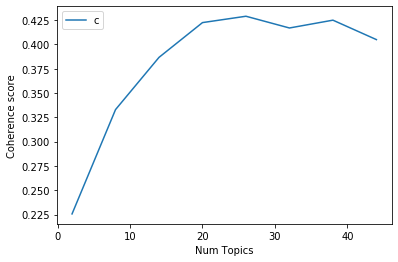

In [57]:
from tqdm import tqdm
from gensim.models.ldamodel import LdaModel 
from gensim.models.callbacks import CoherenceMetric 
from gensim import corpora 
from gensim.models.callbacks import PerplexityMetric 
import logging 
import pyLDAvis.gensim 
from gensim.models.coherencemodel import CoherenceModel 
import matplotlib.pyplot as plt 

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3): 
    coherence_values = [] 
    model_list = [] 
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model) 
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence()) 
    return model_list, coherence_values 

def find_optimal_number_of_topics(dictionary, corpus, processed_data): 
    limit = 50; #토픽 마지막갯수
    start = 2; #토픽 시작갯수
    step = 6; 
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, 
                                                            texts=processed_data, start=start, limit=limit, step=step) 
    x = range(start, limit, step) 
    plt.plot(x, coherence_values) 
    plt.xlabel("Num Topics") 
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best') 
    plt.show() 


processed_data = [sent.strip().split(",") for sent in tqdm(open('./data/review_tokenized.csv', 'r', encoding='utf-8').readlines())]
dictionary = corpora.Dictionary(processed_data) # 출현빈도가 적거나 자주 등장하는 단어는 제거 
dictionary.filter_extremes(no_below=10, no_above=0.05)
corpus = [dictionary.doc2bow(text) for text in processed_data]
print('Number of unique tokens: %d' % len(dictionary)) 
print('Number of documents: %d' % len(corpus))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 
    
# 최적의 토픽 수 찾기 
find_optimal_number_of_topics(dictionary, corpus, processed_data)


100%|█████████████████████████████████████████████████████████████████████████| 15925/15925 [00:00<00:00, 25385.69it/s]
2020-11-11 01:16:52,744 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-11-11 01:16:53,350 : INFO : adding document #10000 to Dictionary(29195 unique tokens: ['가입', '간행', '감속', '감형', '개칭']...)
2020-11-11 01:16:53,731 : INFO : built Dictionary(36448 unique tokens: ['가입', '간행', '감속', '감형', '개칭']...) from 15925 documents (total 874828 corpus positions)
2020-11-11 01:16:53,912 : INFO : discarding 30450 tokens: [('가입', 1644), ('감속', 1), ('건국훈장', 4609), ('계획', 2072), ('규합', 1265), ('단체', 1091), ('대역사건', 1), ('대지진', 2), ('도치기지소', 1), ('도쿄대지진', 1)]...
2020-11-11 01:16:53,913 : INFO : keeping 5998 tokens which were in no less than 10 and no more than 796 (=5.0%) documents
2020-11-11 01:16:53,931 : INFO : resulting dictionary: Dictionary(5998 unique tokens: ['간행', '감형', '개칭', '결혼', '경찰서']...)


Number of unique tokens: 5998
Number of documents: 15925


2020-11-11 01:16:54,296 : INFO : using symmetric alpha at 0.5
2020-11-11 01:16:54,298 : INFO : using symmetric eta at 0.5
2020-11-11 01:16:54,299 : INFO : using serial LDA version on this node
2020-11-11 01:16:54,301 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 15925 documents, updating model once every 2000 documents, evaluating perplexity every 15925 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-11 01:16:54,303 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-11-11 01:16:54,304 : INFO : PROGRESS: pass 0, at document #2000/15925
2020-11-11 01:16:55,316 : INFO : merging changes from 2000 documents into a model of 15925 documents
2020-11-11 01:16:55,318 : INFO : topic #0 (0.500): 0.004*"시장" + 0.004*"의식" + 0.003*"집행유예" + 0.003*"대구" + 0.003*"광주" + 0.003*"안동" + 0.003*"연락" + 0.003*"청년" + 0.003*"강원도" + 0.003*"면사무소"
2020-11-

2020-11-11 01:17:04,479 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-11-11 01:17:04,480 : INFO : PROGRESS: pass 0, at document #2000/15925
2020-11-11 01:17:05,290 : INFO : merging changes from 2000 documents into a model of 15925 documents
2020-11-11 01:17:05,293 : INFO : topic #0 (0.125): 0.006*"독립군" + 0.005*"국민회" + 0.005*"한인" + 0.004*"선임" + 0.004*"광주" + 0.004*"군사" + 0.003*"추진" + 0.003*"지방회" + 0.003*"안동" + 0.003*"부장"
2020-11-11 01:17:05,294 : INFO : topic #2 (0.125): 0.006*"광주" + 0.004*"회원" + 0.004*"전사" + 0.004*"강원도" + 0.003*"투쟁" + 0.003*"강제" + 0.003*"격문" + 0.003*"설립" + 0.003*"전국" + 0.003*"학교"
2020-11-11 01:17:05,296 : INFO : topic #3 (0.125): 0.007*"안동" + 0.005*"전투" + 0.004*"의병진" + 0.004*"회원" + 0.004*"군사" + 0.004*"강원도" + 0.004*"부장" + 0.004*"무장" + 0.003*"행진" + 0.003*"신간회"
2020-11-11 01:17:05,298 : INFO : topic #1 (0.125): 0.005*"집행유예" + 0.005*"읍내" + 0.004*"면암" + 0.004*"시장" + 0.004*"천도교" + 0.00

2020-11-11 01:17:08,326 : INFO : topic diff=0.409189, rho=0.377964
2020-11-11 01:17:08,923 : INFO : -7.732 per-word bound, 212.6 perplexity estimate based on a held-out corpus of 1925 documents with 64773 words
2020-11-11 01:17:08,924 : INFO : PROGRESS: pass 0, at document #15925/15925
2020-11-11 01:17:09,324 : INFO : merging changes from 1925 documents into a model of 15925 documents
2020-11-11 01:17:09,327 : INFO : topic #5 (0.125): 0.011*"부장" + 0.010*"독립군" + 0.009*"상해" + 0.007*"길림성" + 0.007*"망명" + 0.006*"대한민국임시정부" + 0.005*"단원" + 0.005*"러시아" + 0.005*"간부" + 0.005*"임명"
2020-11-11 01:17:09,329 : INFO : topic #6 (0.125): 0.010*"강제" + 0.008*"처단" + 0.006*"체결" + 0.006*"전국" + 0.005*"고문" + 0.005*"복역" + 0.005*"군인" + 0.005*"조약" + 0.004*"충북" + 0.004*"정미"
2020-11-11 01:17:09,330 : INFO : topic #2 (0.125): 0.017*"광주" + 0.009*"격문" + 0.008*"중대장" + 0.006*"참의부" + 0.005*"소대장" + 0.005*"시내" + 0.004*"강원도" + 0.004*"기독교" + 0.004*"고토리" + 0.004*"천도교"
2020-11-11 01:17:09,332 : INFO : topic #1 (0.125): 0.012*"집

2020-11-11 01:17:17,404 : INFO : topic diff=0.669967, rho=0.500000
2020-11-11 01:17:17,406 : INFO : PROGRESS: pass 0, at document #10000/15925
2020-11-11 01:17:17,860 : INFO : merging changes from 2000 documents into a model of 15925 documents
2020-11-11 01:17:17,865 : INFO : topic #13 (0.071): 0.013*"미국" + 0.011*"연길현" + 0.010*"길림성" + 0.008*"국민회" + 0.008*"독립운동사" + 0.008*"총살" + 0.007*"하와이" + 0.006*"항일순국의열사" + 0.006*"참석" + 0.006*"동아일보"
2020-11-11 01:17:17,866 : INFO : topic #8 (0.071): 0.013*"단원" + 0.013*"독립군" + 0.012*"대한독립단" + 0.012*"처단" + 0.009*"부장" + 0.008*"통의부" + 0.007*"밀정" + 0.007*"지단" + 0.007*"길림성" + 0.006*"참의부"
2020-11-11 01:17:17,868 : INFO : topic #10 (0.071): 0.019*"평남" + 0.017*"국민회" + 0.017*"지방회" + 0.014*"평양" + 0.012*"회장" + 0.012*"대한" + 0.009*"홍성군" + 0.009*"천도교" + 0.008*"이날" + 0.008*"읍내"
2020-11-11 01:17:17,870 : INFO : topic #1 (0.071): 0.022*"유림" + 0.018*"충북" + 0.015*"강제" + 0.014*"이강년" + 0.010*"제천" + 0.010*"체결" + 0.009*"김창숙" + 0.008*"서명" + 0.008*"유인석" + 0.008*"파리"
2020-11-11

2020-11-11 01:17:27,669 : INFO : topic #14 (0.050): 0.008*"전사" + 0.007*"이석용" + 0.007*"임실" + 0.006*"전투" + 0.006*"상해" + 0.005*"의성" + 0.004*"부장" + 0.004*"김상종" + 0.004*"의성군" + 0.004*"항거"
2020-11-11 01:17:27,671 : INFO : topic #17 (0.050): 0.013*"의병활동" + 0.009*"처단" + 0.008*"기삼연" + 0.007*"체결" + 0.007*"장성" + 0.006*"군수품" + 0.006*"나주" + 0.006*"전주" + 0.006*"무기" + 0.005*"강제"
2020-11-11 01:17:27,672 : INFO : topic #13 (0.050): 0.015*"국민회" + 0.009*"대한" + 0.008*"부대" + 0.007*"독립군" + 0.007*"자유시" + 0.007*"지회" + 0.007*"지방회" + 0.006*"군사" + 0.005*"한인" + 0.005*"러시아"
2020-11-11 01:17:27,673 : INFO : topic #8 (0.050): 0.011*"안동" + 0.007*"읍내" + 0.007*"의용군" + 0.006*"포위" + 0.006*"시위군" + 0.006*"광주" + 0.006*"대구복심법원" + 0.006*"면사무소" + 0.005*"중대" + 0.005*"천도교"
2020-11-11 01:17:27,674 : INFO : topic diff=0.920357, rho=0.707107
2020-11-11 01:17:27,676 : INFO : PROGRESS: pass 0, at document #6000/15925
2020-11-11 01:17:28,251 : INFO : merging changes from 2000 documents into a model of 15925 documents
2020-11-11 01:17:

2020-11-11 01:17:35,263 : INFO : 9 batches submitted to accumulate stats from 576 documents (-13279 virtual)
2020-11-11 01:17:35,541 : INFO : 62 batches submitted to accumulate stats from 3968 documents (-244331 virtual)
2020-11-11 01:17:35,849 : INFO : 102 batches submitted to accumulate stats from 6528 documents (-361958 virtual)
2020-11-11 01:17:35,999 : INFO : 117 batches submitted to accumulate stats from 7488 documents (-397934 virtual)
2020-11-11 01:17:36,082 : INFO : 124 batches submitted to accumulate stats from 7936 documents (-409143 virtual)
2020-11-11 01:17:37,184 : INFO : 5 accumulators retrieved from output queue
2020-11-11 01:17:37,317 : INFO : accumulated word occurrence stats for 134711 virtual documents
2020-11-11 01:17:37,958 : INFO : using symmetric alpha at 0.038461538461538464
2020-11-11 01:17:37,959 : INFO : using symmetric eta at 0.038461538461538464
2020-11-11 01:17:37,960 : INFO : using serial LDA version on this node
2020-11-11 01:17:37,975 : INFO : running 

2020-11-11 01:17:41,348 : INFO : topic diff=0.611348, rho=0.408248
2020-11-11 01:17:41,349 : INFO : PROGRESS: pass 0, at document #14000/15925
2020-11-11 01:17:41,828 : INFO : merging changes from 2000 documents into a model of 15925 documents
2020-11-11 01:17:41,837 : INFO : topic #2 (0.038): 0.026*"집행" + 0.015*"신간회" + 0.014*"조선공산당" + 0.013*"창립" + 0.012*"개최" + 0.012*"지회" + 0.012*"중앙" + 0.011*"선출" + 0.011*"검거" + 0.011*"간부"
2020-11-11 01:17:41,838 : INFO : topic #21 (0.038): 0.030*"러시아" + 0.015*"한인" + 0.013*"교사" + 0.011*"고려혁명군" + 0.010*"블라디보스토크" + 0.009*"독립군" + 0.009*"학교" + 0.009*"노령" + 0.009*"연해주" + 0.008*"혁명"
2020-11-11 01:17:41,839 : INFO : topic #3 (0.038): 0.059*"유림" + 0.033*"서명" + 0.029*"김창숙" + 0.027*"파리" + 0.024*"작성" + 0.021*"파리강화회의" + 0.020*"독립청원서" + 0.018*"호소" + 0.015*"장서" + 0.015*"파견"
2020-11-11 01:17:41,840 : INFO : topic #4 (0.038): 0.031*"이강년" + 0.024*"강원도" + 0.021*"충북" + 0.018*"제천" + 0.018*"유인석" + 0.016*"전투" + 0.011*"유형" + 0.010*"원주" + 0.010*"안동" + 0.010*"전사"
2020-11-11 01

2020-11-11 01:17:52,861 : INFO : PROGRESS: pass 0, at document #8000/15925
2020-11-11 01:17:53,402 : INFO : merging changes from 2000 documents into a model of 15925 documents
2020-11-11 01:17:53,412 : INFO : topic #17 (0.031): 0.016*"조선민족운동연감" + 0.012*"신사참배" + 0.011*"의식" + 0.011*"회의" + 0.010*"구류" + 0.010*"거부" + 0.010*"미결" + 0.009*"통산" + 0.008*"청원" + 0.007*"대한통의부"
2020-11-11 01:17:53,414 : INFO : topic #1 (0.031): 0.029*"심성지" + 0.029*"청송" + 0.015*"군사" + 0.013*"연계" + 0.012*"적군" + 0.010*"인근" + 0.009*"거의" + 0.008*"합천" + 0.008*"김대" + 0.008*"김하락"
2020-11-11 01:17:53,415 : INFO : topic #8 (0.031): 0.034*"평남" + 0.025*"평양" + 0.016*"동아일보" + 0.014*"제령" + 0.011*"대한민국임시정부" + 0.011*"고문" + 0.010*"흠치교" + 0.009*"폭탄" + 0.009*"단원" + 0.008*"교주"
2020-11-11 01:17:53,416 : INFO : topic #28 (0.031): 0.015*"이석용" + 0.012*"국민회" + 0.010*"회장" + 0.010*"임실" + 0.009*"회원" + 0.007*"의식" + 0.007*"지방회" + 0.007*"실업" + 0.007*"부원" + 0.007*"제원"
2020-11-11 01:17:53,417 : INFO : topic #9 (0.031): 0.011*"진주" + 0.011*"지회" + 0.01

2020-11-11 01:18:05,955 : INFO : topic #7 (0.026): 0.008*"동경" + 0.007*"반대" + 0.006*"치안유지법" + 0.006*"강제" + 0.006*"부장" + 0.006*"정의부" + 0.005*"결사" + 0.005*"군대" + 0.005*"졸업" + 0.004*"군사"
2020-11-11 01:18:05,956 : INFO : topic #17 (0.026): 0.009*"면사무소" + 0.008*"동경" + 0.007*"강원도" + 0.006*"수비대" + 0.006*"천도교" + 0.006*"의식" + 0.005*"비밀" + 0.005*"집행유예" + 0.004*"군자" + 0.004*"학교"
2020-11-11 01:18:05,957 : INFO : topic #23 (0.026): 0.009*"면사무소" + 0.008*"주동" + 0.007*"이해" + 0.006*"다수" + 0.006*"동래" + 0.006*"이용" + 0.006*"소요" + 0.006*"대구복심법원" + 0.005*"확정" + 0.005*"중대장"
2020-11-11 01:18:05,958 : INFO : topic #25 (0.026): 0.005*"비밀결사" + 0.004*"광주" + 0.004*"고종" + 0.004*"소속" + 0.004*"공주" + 0.004*"의식" + 0.004*"설치" + 0.004*"양성" + 0.004*"부장" + 0.004*"한인"
2020-11-11 01:18:05,960 : INFO : topic diff=26.744793, rho=1.000000
2020-11-11 01:18:05,961 : INFO : PROGRESS: pass 0, at document #4000/15925
2020-11-11 01:18:06,524 : INFO : merging changes from 2000 documents into a model of 15925 documents
2020-11-11 01:18:

2020-11-11 01:18:10,965 : INFO : topic #8 (0.026): 0.078*"광복군" + 0.045*"입대" + 0.042*"지대" + 0.027*"훈련" + 0.017*"광복" + 0.014*"탈출" + 0.014*"정보" + 0.013*"중경" + 0.012*"총사령부" + 0.011*"공작"
2020-11-11 01:18:10,966 : INFO : topic #23 (0.026): 0.030*"주동" + 0.020*"제작" + 0.019*"기간" + 0.017*"이해" + 0.015*"다수" + 0.014*"대구지방법원" + 0.014*"미결" + 0.013*"대구복심법원" + 0.013*"소요" + 0.013*"합산"
2020-11-11 01:18:10,967 : INFO : topic #22 (0.026): 0.052*"함북" + 0.017*"화순" + 0.016*"공격" + 0.016*"광주" + 0.014*"의성군" + 0.014*"양회일" + 0.014*"리민" + 0.014*"청진" + 0.013*"회령" + 0.011*"흥덕"
2020-11-11 01:18:10,968 : INFO : topic #11 (0.026): 0.026*"이강년" + 0.019*"충북" + 0.017*"문경" + 0.017*"안성군" + 0.012*"제천" + 0.009*"성주" + 0.009*"파주" + 0.008*"허위" + 0.007*"적성" + 0.006*"격전"
2020-11-11 01:18:10,970 : INFO : topic diff=0.616529, rho=0.353553
2020-11-11 01:18:10,978 : INFO : using ParallelWordOccurrenceAccumulator(processes=5, batch_size=64) to estimate probabilities from sliding windows
2020-11-11 01:18:14,938 : INFO : 8 batches submitte

2020-11-11 01:18:23,889 : INFO : topic diff=0.813197, rho=0.447214
2020-11-11 01:18:23,890 : INFO : PROGRESS: pass 0, at document #12000/15925
2020-11-11 01:18:24,390 : INFO : merging changes from 2000 documents into a model of 15925 documents
2020-11-11 01:18:24,404 : INFO : topic #21 (0.023): 0.028*"이석용" + 0.021*"임실" + 0.018*"일원" + 0.017*"부하" + 0.014*"교수" + 0.013*"전사" + 0.013*"총살" + 0.012*"전주" + 0.011*"출신" + 0.011*"춘천"
2020-11-11 01:18:24,405 : INFO : topic #22 (0.023): 0.027*"참의부" + 0.025*"처단" + 0.024*"통의부" + 0.020*"중대장" + 0.019*"대한독립단" + 0.018*"소대장" + 0.017*"부장" + 0.016*"밀정" + 0.016*"순사" + 0.015*"집안"
2020-11-11 01:18:24,406 : INFO : topic #32 (0.023): 0.022*"비밀결사" + 0.016*"의식" + 0.016*"협의" + 0.015*"치안유지법" + 0.014*"회합" + 0.012*"지도" + 0.011*"책임" + 0.011*"농민" + 0.010*"동교" + 0.010*"신간회"
2020-11-11 01:18:24,407 : INFO : topic #13 (0.023): 0.060*"황해도" + 0.018*"탈출" + 0.017*"수형" + 0.015*"해주" + 0.014*"천진" + 0.013*"조선의용대" + 0.013*"연안" + 0.012*"이송" + 0.012*"화북" + 0.011*"장연"
2020-11-11 01:18:2

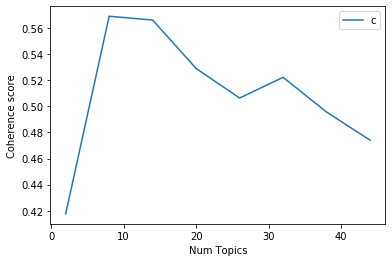

In [58]:
processed_data = [sent.strip().split(",") for sent in tqdm(open('./data/tokenized_data.csv', 'r', encoding='utf-8').readlines())]
dictionary = corpora.Dictionary(processed_data) # 출현빈도가 적거나 자주 등장하는 단어는 제거 
dictionary.filter_extremes(no_below=10, no_above=0.05)
corpus = [dictionary.doc2bow(text) for text in processed_data]
print('Number of unique tokens: %d' % len(dictionary)) 
print('Number of documents: %d' % len(corpus))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 
    
# 최적의 토픽 수 찾기 
find_optimal_number_of_topics(dictionary, corpus, processed_data)